### Lab 10 - word2vec for Musical instrument reviews
In this lab, you will be building and training Word2Vec embeddings for textual data and visualizing the embeddings using UMAP (Uniform Manifold Approximation and Projection).

Steps:
- Import 
libraries
- Create a training and testing split of the data. 90% of the data is used for training, and 10% for testing.
- Create sequences of purchases made by reviewers in both the training and testing sets.
- Perform text preprocessing on the 'reviewText' column of the DataFrame. This includes converting text to lowercase, removing non-alphabetic characters, and stemming words.
- Train a Word2Vec model on the preprocessed text data (allreviews) to learn word embeddings.
- Find the 5 most similar words to the word "bass" and "guitar" in the trained Word2Vec model.
- Train a Word2Vec model on the purchase history of the reviewers (product IDs) in the training set to learn product embeddings.
- Train another Word2Vec model on the purchase history of the reviewers in the training set.
- Extract the word vectors (product embeddings) from the trained Word2Vec model.
- Visualize the word embeddings using UMAP.
- Creates a scatter plot of the UMAP projections of the word embeddings.


#### import libraries: pandas, numpy, random, tqdm, matplotlib, warnings, and import Word2Vec from gensim.models

In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec

import warnings;
warnings.filterwarnings('ignore')

#### using pandas, import the file: reviews_Musical_Instruments_5.json', lines=True

In [2]:
df = pd.read_json('reviews_Musical_Instruments_5.json', lines=True)

#### display the head

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


#### display info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


#### look for missing values in all the columns using isna

In [5]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

#### look for null values in all the columns using isnull

In [6]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

#### remove missing values by dropping all the rows with missing values

In [7]:
df.dropna(inplace=True)

#### display the head

In [8]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


#### display the last five records

In [9]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


#### find the number of unique reviewers in our dataset using a list

In [10]:
reviewers = set(df['reviewerID'])
reviewers = list(reviewers)
len(reviewers)

1428

#### find the number of unique reviewers in our dataset using  .unique.tolist

In [11]:
reviewers = df['reviewerID'].unique().tolist()
len(reviewers)

1428

#### There are 1,428 customers in our dataset. For each of these customers, you will extract their buying history. In other words, we can have 1,428 sequences of purchases.

#### It is a good practice to set aside a small part of the dataset for validation purposes. Therefore, we will use the data of 90% of the customers to create word2vec embeddings. 

#### Let’s split the data.

#### Create a training list with 90% of the data

In [12]:
# Seed
random.seed(117)
# Training list  --- One line of code
reviewers_train = [reviewers[i] for i in range(round(0.9*len(reviewers)))]

#### print the length of the list

In [13]:
len(reviewers_train)

1285

### split data into train and test

#### create a training dataframe with the reviewerID using isin and the customer_train created above

In [14]:
# Training DF using the reviewer list    -    One line of code
train_df = df[df['reviewerID'].isin(reviewers_train)]

#### print the length of the list (train_df)

In [15]:
len(train_df)

9417

#### create a test dataframe with the reviewerID using isin and the customer_train created above

In [16]:
test_df = df[~df['reviewerID'].isin(reviewers_train)]

#### Print the length of test_df

In [17]:
len(test_df)

817

#### Create sequences of purchases made by the reviewers in the dataset for both the train and validation sets. You need to code three blocks of code. In the first two, you need a list called: purchases_train = []; in the last block, you need a list called: purchases_test = []. Also, you need a for lop and use tqdm in every block.

In [18]:
# list to capture purchase history of the reviewers
purchases_train = []

# populate the list with the product codes.
# use a variable called temp 
# append the values
# Two lines of code: 
for i in tqdm(reviewers_train):
    temp = train_df[train_df['reviewerID'] == i]['asin'].tolist()
    purchases_train.append(temp)
    

100%|█████████████████████████████████████████████████████████████████████████████| 1285/1285 [00:02<00:00, 457.29it/s]


In [19]:
# Purchase history sequence - Train
purchases_train = []

# Complete the two lines of code to append the data.
for i in tqdm(reviewers_train):
    in_training = train_df[train_df['reviewerID'] == i]['asin'].tolist()
    purchases_train.append(in_training)
    

100%|█████████████████████████████████████████████████████████████████████████████| 1285/1285 [00:02<00:00, 444.84it/s]


In [20]:
# Same process, purchase history - Test
purchases_test = []

# Complete the two lines of code to append the data.
for i in tqdm(test_df['reviewerID'].unique()):
    in_training = test_df[test_df['reviewerID'] == i]['asin'].tolist()
    purchases_test.append(in_training)
    

100%|██████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<00:00, 1606.85it/s]


#### import nltp, re, and PorterStemmer from nltk.stem.porter

In [21]:
import nltk
import re
from nltk.stem.porter import PorterStemmer

#### Explain the block of code below and run it

This is used for text preprocessing, cleaning and preparing text data in the reviewText column of a DataFrame (df).

stopword_list 
loads a list of common English stopwords (the, is, in) from the nltk library

st 
creates an instance of the PorterStemmer, a tool for stemming words, which reduces words to their root form

df.reviewText = df.reviewText.str.lower()
Converts all text in the reviewText column to lowercase

df.reviewText = df.reviewText.apply(lambda x: re.sub(' +', ' ', re.sub(r'[^a-z]', ' ', x)))
Uses regular expressions to remove any character that is not a lowercase latter and replaces it with a space.  The second re.sub replaces any occurence of multiple spaces with a single space.

df.reviewText = df.reviewText.apply(lambda x: " ".join([st.stem(i) for i in x.split() if i not in stopword_list]))
Splits each cleaned review text into individual words, removes any words that are stopwords, and applies stemming to the remaining words.

allreviews = list(df.reviewText)
Converts the cleaned reviewText column to a list of strings.

allreviews = [i.split() for i in allreviews]
Splits each string into a list of individual words, creating a list of lists.

In [22]:
stopword_list = nltk.corpus.stopwords.words('english')
st = PorterStemmer()

df.reviewText = df.reviewText.str.lower()
df.reviewText = df.reviewText.apply(lambda x: re.sub(' +', ' ', re.sub(r'[^a-z]', ' ', x)))
df.reviewText = df.reviewText.apply(lambda x: " ".join([st.stem(i) for i in x.split() if i not in stopword_list]))

allreviews = list(df.reviewText)
allreviews = [i.split() for i in allreviews]

#### import Word2Vec from gensim.models.word2vec

In [23]:
from gensim.models import Word2Vec

#### create a model using: <br>Word2Vec(min_count = 5) <br> build_vocab(allreviews) <br> train(allreviews, total_examples = model.corpus_count, epochs = 10)

In [24]:
# Three lines of code: 
model = Word2Vec(window=10, min_count=5, sg=1, hs=0, negative=10, alpha=0.03, min_alpha=0.0007, seed=4)

model.build_vocab(allreviews, progress_per=200)

model.train(allreviews, total_examples = model.corpus_count, epochs=10, report_delay=1)

(3951275, 4579030)

### Using the model above, display the 5 most similar words to "bass" 

In [25]:
model.wv.most_similar(positive='bass', topn=5)

[('hofner', 0.6471413969993591),
 ('ae', 0.5782425403594971),
 ('thump', 0.5679152011871338),
 ('para', 0.5516454577445984),
 ('neutral', 0.5501152276992798)]

### Using the model above, display the 5 most similar words to "guitar" 

In [26]:
model.wv.most_similar(positive='guitar', topn=5)

[('acoust', 0.7196950316429138),
 ('electr', 0.712263286113739),
 ('hummingbird', 0.7051588296890259),
 ('instrument', 0.6848500967025757),
 ('uncl', 0.6741532683372498)]

#### Let's use a different model

#### Build word2vec Embeddings for Products

In [27]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(79761, 94170)

In [28]:
# Build & train W2V model
model = Word2Vec(window=10, sg=1, hs=0, negative=10, alpha=0.03, min_alpha=0.0007, seed=4)
model.build_vocab(purchases_train, progress_per=200)
model.train(purchases_train, total_examples=model.corpus_count, epochs=10, report_delay=1)

(79683, 94170)

#### print out the summary of “model”:

In [29]:
print(model)

Word2Vec<vocab=784, vector_size=100, alpha=0.03>


Our model has a vocabulary of 787 unique words and their vectors of size 100 each. Next, we will extract the vectors of all the words in our vocabulary and store it in one place for easy access.

#### extract all vectors in a variable called X

In [30]:
X = list(model.wv.index_to_key)

In [31]:
X = model.wv[model.wv.key_to_index]

#### Print the shape of X

In [32]:
X.shape

(784, 100)

#### Visualize word2vec Embeddings usign umap

In [33]:
#!pip install umap
#!pip install umap-learn

In [34]:
import umap.umap_ as umap

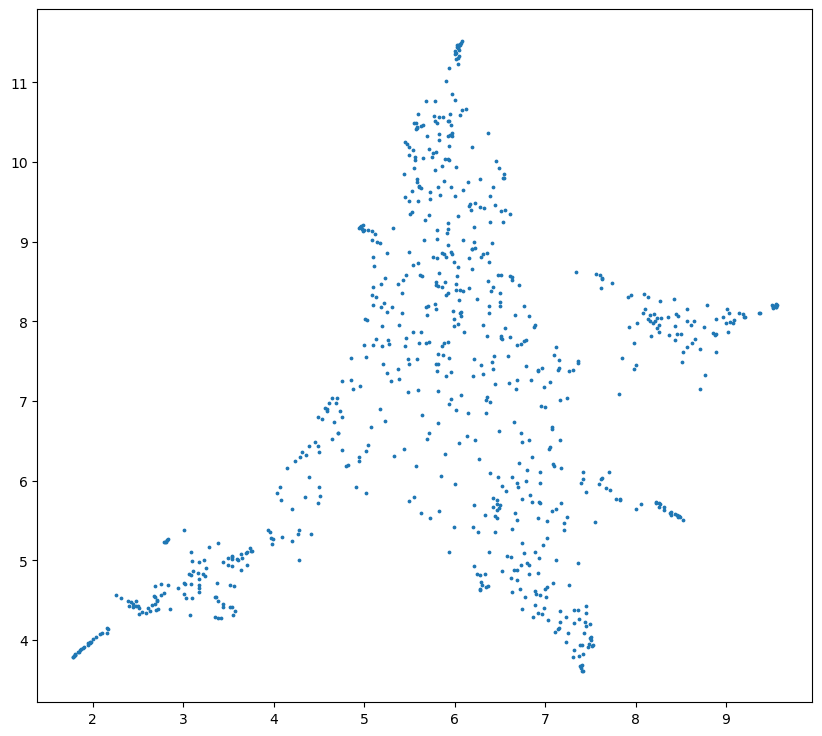

In [35]:
reducer=umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42)
result=reducer.fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(result[:, 0], result[:, 1], s=3, cmap='Spectral')


Every dot in this plot is a product. As you can see, there are several tiny clusters of these data points. These are groups of similar products.